In [11]:
import sys
sys.path.append('/home/pqbas/catkin_ws/src/blueberry-detection-ros/src/')
from object_detection_models.yolo8 import Yolo8
from utils_.reading_writting import get_image_paths
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

In [4]:
detector = Yolo8(weights='/home/pqbas/catkin_ws/src/blueberry/src/detection/weights/22Sep23/yolov8m_best.pt',
                 device='cuda:0')

In [5]:
image_paths = get_image_paths('/home/pqbas/catkin_ws/src/blueberry-detection-ros/src/gallery/23nov23')

In [60]:
%%capture

time_list = []

for path in image_paths:
    start = time.time()

    img = cv2.imread(path)
    prediction = detector.predict(img)

    end = time.time()
    time_list.append(end-start)


0: 640x640 8 0s, 36.6ms
Speed: 3.0ms preprocess, 36.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 11 0s, 39.0ms
Speed: 2.5ms preprocess, 39.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 0s, 34.4ms
Speed: 2.4ms preprocess, 34.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 0s, 27.4ms
Speed: 2.5ms preprocess, 27.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 0s, 26.9ms
Speed: 2.8ms preprocess, 26.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 14 0s, 24.9ms
Speed: 2.5ms preprocess, 24.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 0s, 21.6ms
Speed: 2.7ms preprocess, 21.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 0s, 19.7ms
Speed: 2.6ms preprocess, 19.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 0s, 19.0m

In [61]:
yolov8_time_array = np.array(time_list)
yolov8_time_avg = np.average(yolov8_time_array)
yolov8_time_stdv = np.std(yolov8_time_array)

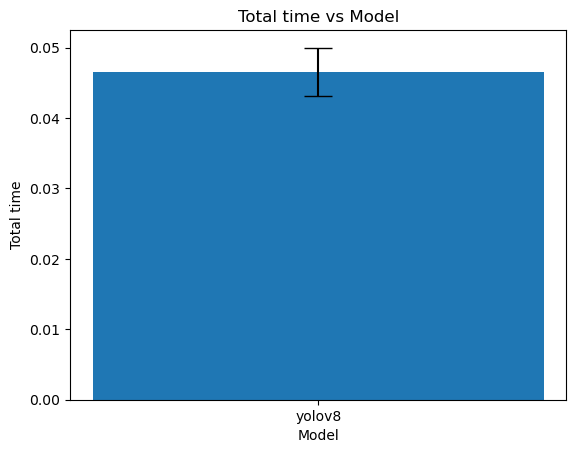

In [62]:
plt.bar(['yolov8'],[yolov8_time_avg],yerr=[yolov8_time_stdv], capsize=10)
plt.xlabel('Model')
plt.ylabel('Total time')
plt.title('Total time vs Model')
plt.savefig('totalTime_vs_model.png')
plt.show()

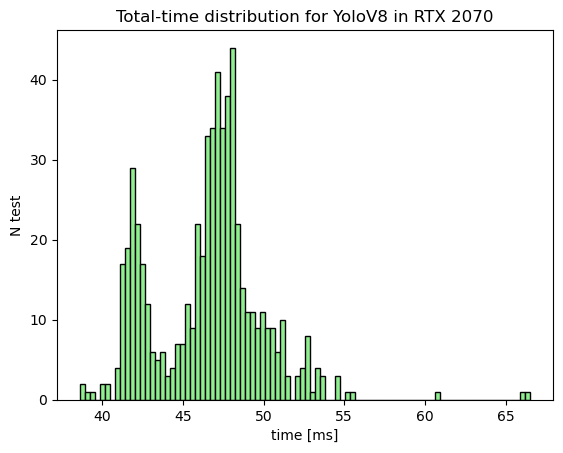

In [67]:
plt.hist(yolov8_time_array*1000, color='lightgreen', ec='black', bins=90)
plt.xlabel('time [ms]')
plt.ylabel('N test')
plt.title('Total-time distribution for YoloV8 in RTX 2070')
plt.savefig('totalTimeDistribution_vs_model.png')
plt.show()